## Мини-исследование: Демографический анализ аудитории трех сообществ по йоге в VK

### Описание проекта
Цель исследования — анализ демографических характеристик подписчиков трех сообществ VK, посвященных йоге и духовным практикам: [AllYogaTours | Йога-туры и ретриты](https://vk.com/allyogatours) (1 948
 подписчиков), [Йога для Здоровья](https://vk.com/yogadlyazdorovya) (3 118
 подписчиков), [Алексей Мередов. Веды, йога, рэйки, хиромантия](https://vk.com/aleksey_meredov) (2 428
 подписчиков). Это позволит выявить особенности аудитории, а также их корреляции с разными факторами, такими как возраст, пол и место проживания.

---

### Задачи исследования
1. Проанализировать возраст, пол и географию пользователей.
3. Визуализировать данные, чтобы выделить ключевые тренды и связи.

---

### План работы
1. **Собрать данные** о подписчиках из трех сообществ через VK API.
2. **Обработать данные**: преобразовать типы данных, заполнить пропуски.
3. **Рассчитать дополнительные метрики**: возраст пользователей и их распределение по городам.
4. **Выполнить разведочный анализ (EDA)**:
   - Проверка пропусков и аномальных значений.
   - Оценка возрастной и половой статистики.
   - Определение городов с наибольшим числом подписчиков.
5. **Сравнение аудиторий** разных сообществ и выделение ключевых различий.
6. **Визуализировать результаты**: линейные графики, гистограммы, бар-чарты.

---

### Гипотезы
- **Возрастное распределение**: женщины могут составлять более молодую аудиторию, чем мужчины. 
- **Географическая привязка**: направление йоги и духовных практик больше привлекает людей из крупных городов.
- **Половое распределение**: йога и духовные практики привлекут скорее женскую, чем мужскую аудиторию.


In [1]:
pip install vk_api


Note: you may need to restart the kernel to use updated packages.


### Ход работы

#### Импортируем библиотеки и инициализируем API

In [2]:
import vk_api
import pandas as pd
import time

# Токен доступа для ВКонтакте API
token = ''


# Список ID сообществ, которые будем анализировать
group_ids = ["yogadlyazdorovya", "satnam.club", "aleksey_meredov"]  


In [3]:
# Авторизация в ВКонтакте
try:
    vk_session = vk_api.VkApi(token=token)
    vk = vk_session.get_api()
    print("Успешно авторизовались в API ВКонтакте!")
except Exception as e:
    print(f"Ошибка авторизации: {e}")



Успешно авторизовались в API ВКонтакте!


#### Создаём датасет

In [ ]:
import vk_api
import pandas as pd

# Авторизация
vk_session = vk_api.VkApi(token='vk1.a.Sy36EacUT-sIO1IiKKgva66C4k-ykh1cNy9ASmMf5jxB4AMquUUdBdza1qjeGgyD6aMxO0QEgPsJkdcnVDRKKYZxXIEw0dN3eMIybKPeqzqahQFpFHyntGmX6h8Mx6mWwFnBDUVH-xeDmt0XnPZ6ce0i3ShPIXzwVNdHi1nUDcKoLXfTJNgP1eI51JzMK3uIq9d825MgYL4d9ius1yXvuQ')
vk = vk_session.get_api()

# Функция для получения информации о пользователях сообщества с пагинацией
def get_group_members(group_id):
    members = []
    offset = 0  # Начинаем с первого пользователя
    while True:
        try:
            # Получаем 1000 пользователей с текущим смещением
            response = vk.groups.getMembers(group_id=group_id, offset=offset)
            if response.get('items'):
                for user_id in response['items']:
                    # Получаем подробности о пользователе
                    user_info = vk.users.get(user_ids=user_id, fields="sex,bdate,city")
                    user_data = user_info[0]
                    members.append({
                        'user_id': user_data.get('id'),
                        'sex': user_data.get('sex'),
                        'bdate': user_data.get('bdate'),
                        'city': user_data.get('city', {}).get('title', 'Unknown'),
                    })
                print(f"Получено {len(members)} пользователей.")
                offset += 1000  # Увеличиваем смещение на 1000
            else:
                print(f"Нет пользователей в сообществе {group_id}.")
                break
        except Exception as e:
            print(f"Ошибка при получении данных о пользователях для {group_id}: {e}")
            break
    
    return members

# Пример использования функции
group_ids = ['yogadlyazdorovya', 'allyogatours', 'aleksey_meredov']
all_members = []

for group_id in group_ids:
    print(f"Начинаем обработку для группы {group_id}")
    group_members = get_group_members(group_id)
    all_members.extend(group_members)

# Сохраняем собранные данные в CSV
df = pd.DataFrame(all_members)
df.to_csv('vk_members.csv', index=False)

print(f"Всего пользователей в совокупности: {len(all_members)}")


#### Разведочный анализ

In [1]:

import pandas as pd

df = pd.read_csv('vk_members.csv')

# Описание типов данных и первичное ознакомление с данными
print(df.info())

# Преобразуем bdate в datetime и создадим столбец для года рождения
df['bdate'] = pd.to_datetime(df['bdate'], errors='coerce')

# Создаем столбец с годом рождения
df['birth_year'] = df['bdate'].dt.year

# Заменяем NaN значения на 0
df['birth_year'] = df['birth_year'].fillna(0).astype(int)


# Проверим информацию по столбцам
print(df.head())

# Преобразуем пол (sex) в категориальный тип
df['sex'] = df['sex'].astype('category')

# Убедимся, что данные правильно подготовлены
print(df[['bdate', 'birth_year', 'sex', 'city']].head())

# Разведочный анализ (EDA)
# Проверим уникальные значения в столбцах
print(df['sex'].value_counts())  # Пол
print(df['city'].value_counts())  # Города
print(df['birth_year'].value_counts())  # Год рождения

# Результат
print(df[['sex', 'birth_year', 'city']].head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  7494 non-null   int64 
 1   sex      7494 non-null   int64 
 2   bdate    5299 non-null   object
 3   city     7494 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.3+ KB
None
   user_id  sex      bdate             city  birth_year
0    14768    1        NaT          Unknown           0
1    22665    2        NaT  Санкт-Петербург           0
2    41760    2 1987-06-23           Москва        1987
3    43881    2        NaT  Санкт-Петербург           0
4   138716    2        NaT           Москва           0
       bdate  birth_year sex             city
0        NaT           0   1          Unknown
1        NaT           0   2  Санкт-Петербург
2 1987-06-23        1987   2           Москва
3        NaT           0   2  Санкт-Петербург
4        NaT           0   2           Москва
sex

/var/folders/2l/pb7yrvtx3kg069_pywwb1r4h0000gn/T/ipykernel_33314/172518079.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['bdate'] = pd.to_datetime(df['bdate'], errors='coerce')


In [2]:
df['bdate'] = df['bdate'].replace("", "0").fillna("0")

display(df)
df.to_csv('vk_members_clean.csv', index=False, encoding='utf-8')


,user_id,sex,bdate,city,birth_year
0,14768,1,0,Unknown,0
1,22665,2,0,Санкт-Петербург,0
2,41760,2,1987-06-23 00:00:00,Москва,1987
3,43881,2,0,Санкт-Петербург,0
4,138716,2,0,Москва,0
...,...,...,...,...,...
7489,1021958537,1,1970-10-19 00:00:00,Unknown,1970
7490,1023958116,2,1985-01-08 00:00:00,Алма-Ата,1985
7491,1025526204,1,2000-01-01 00:00:00,Unknown,2000
7492,1025848366,1,1966-01-17 00:00:00,Unknown,1966


### Приступаем к проверке гипотез
 Анализируем возраст, пол и географию пользователей.

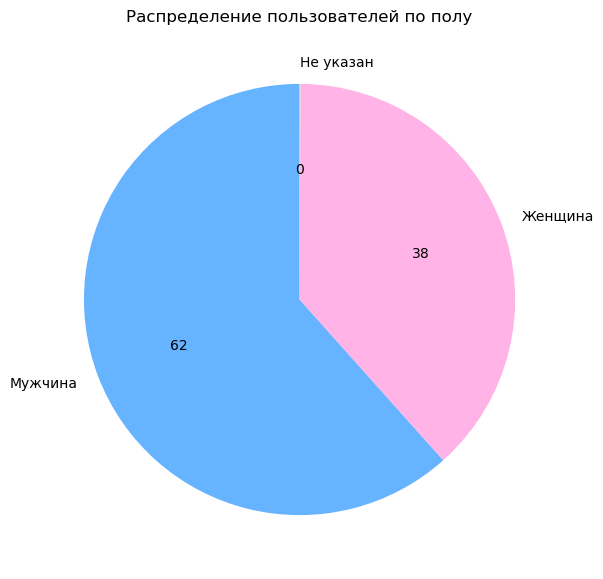

sex_label
Мужчина      4617
Женщина      2872
Не указан       5
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt

# Преобразуем значения в столбце 'sex' в более читаемые метки
sex_labels = {1: 'Мужчина', 2: 'Женщина', 0: 'Не указан'}

# Заменяем значения в столбце 'sex' на метки
df['sex_label'] = df['sex'].map(sex_labels)

# Считаем количество каждого пола
sex_counts = df['sex_label'].value_counts()

# Построим круговую диаграмму с точными числами
plt.figure(figsize=(7,7))
sex_counts.plot(kind='pie', autopct='%1.0f', startangle=90, colors=['#66b3ff', '#ffb3e6', '#d3d3d3'])
plt.title('Распределение пользователей по полу')
plt.ylabel('')  # Убираем подпись оси y
plt.show()

# Выведем числовые значения
print(sex_counts)

#### Вывод: 
Моя гипотеза о том, что  йога и духовные практики привлекут скорее женскую, чем мужскую аудиторию, 
оказалась ошибочна: на графике видно, что мужчины преобладают в сообществах по йоге (62%).

/var/folders/2l/pb7yrvtx3kg069_pywwb1r4h0000gn/T/ipykernel_33314/1316049480.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['birth_year'] = pd.to_datetime(df['bdate'], errors='coerce').dt.year
/var/folders/2l/pb7yrvtx3kg069_pywwb1r4h0000gn/T/ipykernel_33314/1316049480.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


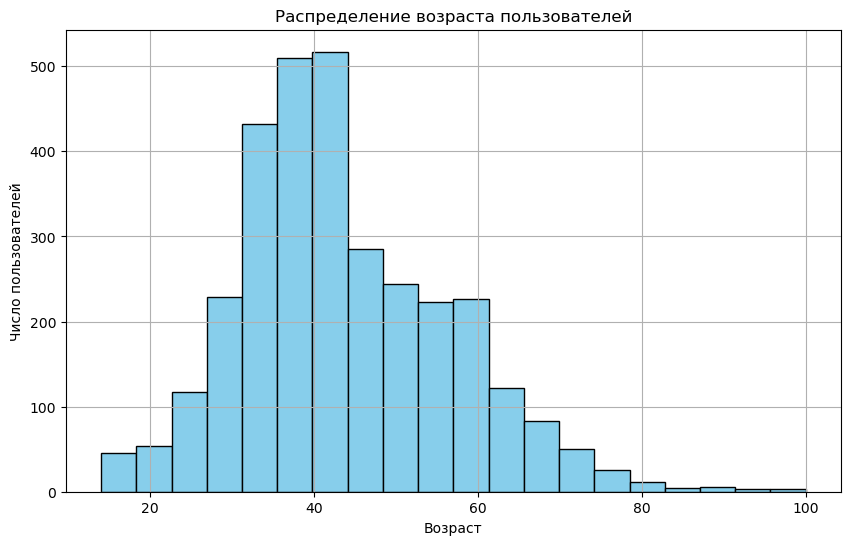

Среднее значение возраста (без пользователей старше 100 лет): 43.53276889306993


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Функция для расчёта возраста
def calculate_age(df):
    if 'bdate' in df.columns:  # Проверяем, есть ли колонка bdate
        current_year = pd.to_datetime('today').year
        # Заменим пустые значения на 0 (или другие, которые вам подходят)
        df['bdate'].fillna(0, inplace=True)
        df['bdate'] = df['bdate'].replace("", "0")
        
        # Преобразуем колонку bdate в дату, если это возможно
        df['birth_year'] = pd.to_datetime(df['bdate'], errors='coerce').dt.year
        
        # Рассчитываем возраст
        df['age'] = current_year - df['birth_year']
        
        # Убираем строки, где возраст не был рассчитан (NaN)
        df = df[df['age'].notna()]
        
        # Приводим возраст к целочисленному типу
        df['age'] = df['age'].astype(int)
        
        # Удаляем временный столбец birth_year
        df = df.drop(columns=['birth_year'])
        
    return df

# Копируем оригинальный датасет в новый
df_clean = df.copy()

# Применяем функцию к очищенному DataFrame
df_clean = calculate_age(df_clean)

# Фильтрация: удаляем пользователей старше 100 лет
df_clean = df_clean[df_clean['age'] <= 100]

# Теперь у вас есть очищенный датасет (df_clean), который не изменяет оригинальный
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df_clean['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.grid(True)
plt.show()

# Рассчитаем среднее значение возраста
mean_age = df_clean['age'].mean()

# Выведем результаты
print(f"Среднее значение возраста (без пользователей старше 100 лет): {mean_age}")


#### Вывод: 
Средний возраст участников сообществ составил 43 с половиной года. Большинство пользователей, ориентируясь по графику, в возрасте 35-45 лет.

#### Проверка гипотезы: 
женщины могут составлять более молодую аудиторию, чем мужчины. 

/var/folders/2l/pb7yrvtx3kg069_pywwb1r4h0000gn/T/ipykernel_33314/3993918647.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['birth_year'] = pd.to_datetime(df['bdate'], errors='coerce').dt.year
/var/folders/2l/pb7yrvtx3kg069_pywwb1r4h0000gn/T/ipykernel_33314/3993918647.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

Средний возраст мужчин: 44.15206331260599
Средний возраст женщин: 42.74170783345095
Медиана возраста мужчин: 41.0
Медиана возраста женщин: 41.0


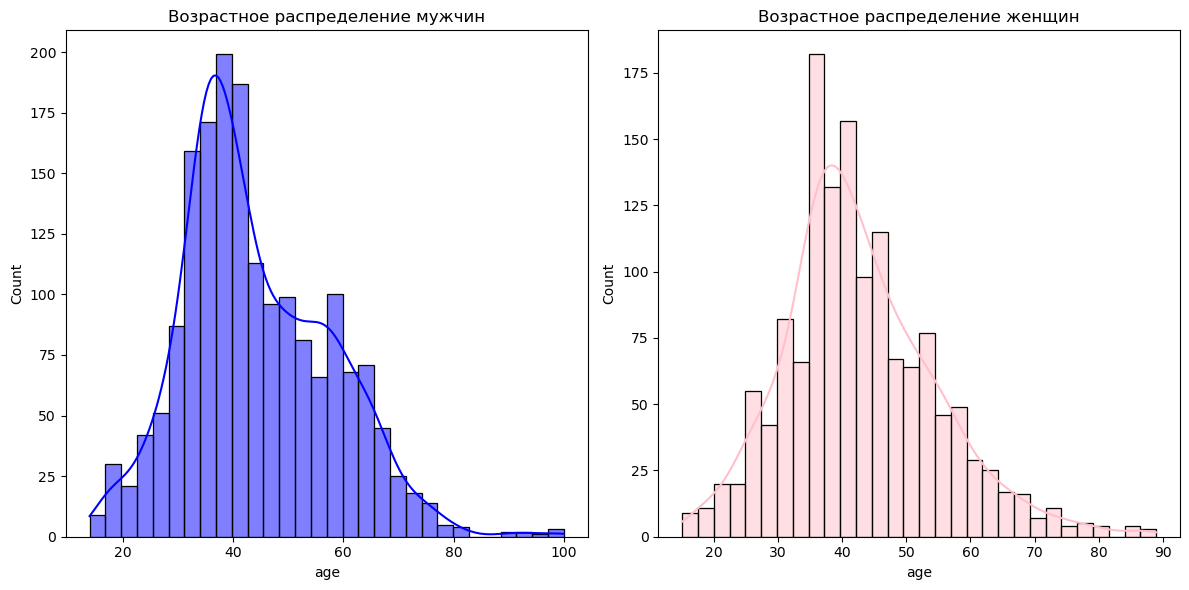

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Функция для расчёта возраста
def calculate_age(df):
    if 'bdate' in df.columns:  # Проверяем, есть ли колонка bdate
        current_year = pd.to_datetime('today').year
        # Заменим пустые значения на 0 (или другие, которые вам подходят)
        df['bdate'].fillna(0, inplace=True)
        df['bdate'] = df['bdate'].replace("", "0")
        
        # Преобразуем колонку bdate в дату, если это возможно
        df['birth_year'] = pd.to_datetime(df['bdate'], errors='coerce').dt.year
        
        # Рассчитываем возраст
        df['age'] = current_year - df['birth_year']
        
        # Убираем строки, где возраст не был рассчитан (NaN)
        df = df[df['age'].notna()]
        
        # Приводим возраст к целочисленному типу
        df['age'] = df['age'].astype(int)
        
        # Удаляем временный столбец birth_year
        df = df.drop(columns=['birth_year'])
        
    return df

# Копируем оригинальный датасет в новый
df_clean = df.copy()

# Применяем функцию к очищенному DataFrame
df_clean = calculate_age(df_clean)

# Фильтрация: удаляем пользователей старше 100 лет
df_clean = df_clean[df_clean['age'] <= 100]

# Фильтруем данные по полу: 1 - мужчины, 2 - женщины
df_men = df_clean[df_clean['sex'] == 1]
df_women = df_clean[df_clean['sex'] == 2]

# Рассчитаем средний возраст для мужчин и женщин
mean_age_men = df_men['age'].mean()
mean_age_women = df_women['age'].mean()

# Рассчитаем медиану возраста для мужчин и женщин
median_age_men = df_men['age'].median()
median_age_women = df_women['age'].median()

# Выведем результаты
print(f"Средний возраст мужчин: {mean_age_men}")
print(f"Средний возраст женщин: {mean_age_women}")
print(f"Медиана возраста мужчин: {median_age_men}")
print(f"Медиана возраста женщин: {median_age_women}")

# Построим гистограммы для возраста мужчин и женщин
plt.figure(figsize=(12, 6))

# Гистограмма для мужчин
plt.subplot(1, 2, 1)
sns.histplot(df_men['age'], kde=True, color='blue', bins=30)
plt.title('Возрастное распределение мужчин')

# Гистограмма для женщин
plt.subplot(1, 2, 2)
sns.histplot(df_women['age'], kde=True, color='pink', bins=30)
plt.title('Возрастное распределение женщин')

plt.tight_layout()
plt.show()


#### Вывод: 
Гипотеза "Женщины могут составлять более молодую аудиторию, чем мужчины" не подтверждается в полном объеме, так как средний возраст женщин немного меньше, но разница не является значительной. Медиана возраста для обеих групп одинаковая, что также указывает на схожесть возрастного распределения между мужчинами и женщинами.

#### Проверка гипотезы: 
направление йоги и духовных практик больше привлекает людей из крупных городов.

is_large_city
0    4697
1    2797
Name: count, dtype: int64


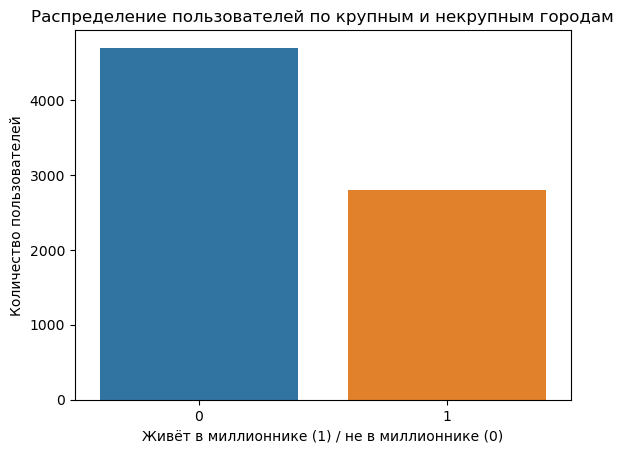

In [9]:
# Список городов-миллионников России
large_cities = ['Москва', 'Санкт-Петербург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Екатеринбург', 'Новосибирск', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград', 'Владивосток']

# Создадим новый столбец, который будет отмечать, крупный город это или нет
df['is_large_city'] = df['city'].apply(lambda x: 1 if x in large_cities else 0)

# Проверим распределение пользователей по крупным и не крупным городам
city_distribution = df['is_large_city'].value_counts()

# Выведем распределение
print(city_distribution)
# Сохраняем таблицу в CSV
city_distribution.to_csv('vk_yoga_users_with_city_labels.csv', index=False, encoding='utf-8')

import seaborn as sns
import matplotlib.pyplot as plt

# Столбчатая диаграмма для распределения по крупным и не крупным городам
sns.countplot(x='is_large_city', data=df)
plt.title('Распределение пользователей по крупным и некрупным городам')
plt.xlabel('Живёт в миллионнике (1) / не в миллионнике (0)')
plt.ylabel('Количество пользователей')
plt.show()



#### Вывод: 
Большинство участников живут в крупных городах, что подтверждает гипотезу о большей популярности йоги и духовных практик в мегаполисах. 

In [10]:
display(df)

,user_id,sex,bdate,city,birth_year,sex_label,is_large_city
0,14768,1,0,Unknown,0,Мужчина,0
1,22665,2,0,Санкт-Петербург,0,Женщина,1
2,41760,2,1987-06-23 00:00:00,Москва,1987,Женщина,1
3,43881,2,0,Санкт-Петербург,0,Женщина,1
4,138716,2,0,Москва,0,Женщина,1
...,...,...,...,...,...,...,...
7489,1021958537,1,1970-10-19 00:00:00,Unknown,1970,Мужчина,0
7490,1023958116,2,1985-01-08 00:00:00,Алма-Ата,1985,Женщина,0
7491,1025526204,1,2000-01-01 00:00:00,Unknown,2000,Мужчина,0
7492,1025848366,1,1966-01-17 00:00:00,Unknown,1966,Мужчина,0


# **РЕЗУЛЬТАТЫ ИССЛЕДОВАНИЯ**



В ходе анализа возрастных, половых и географических данных пользователей сообществ, связанных с йогой и духовными практиками, были проверены несколько гипотез. Результаты были визуализированы и проанализированы для подтверждения или опровержения гипотез.

### 1. Пол аудитории
Несмотря на распространённый стереотип, что йога и духовные практики более популярны среди женщин, **62% участников сообщества составляют мужчины**. Это означает, что в составе аудитории преобладают мужчины, и гипотеза о женской доминирующей аудитории **не подтвердилась**.

### 2. Возраст аудитории
Средний возраст участников составил **43,5 года**. Большинство пользователей находятся в возрастной категории **35-45 лет**. Гипотеза о том, что женщины могут составлять более молодую аудиторию, не подтвердилась в полной мере, поскольку средний возраст женщин **немного меньше**, но разница незначительная. Медиана возраста для обоих полов одинаковая, что указывает на схожесть возрастного распределения.

### 3. География участников
Большинство участников (**4697 из 7494**) проживает в крупных городах, что **подтверждает гипотезу о популярности йоги и духовных практик в мегаполисах**. Гипотеза о большей популярности йоги среди жителей крупных городов **подтвердилась**.

---

Таким образом, результат исследования показал, что йога и духовные практики привлекают **больше мужчин и людей из крупных городов**, а возрастное распределение пользователей по полам практически одинаково.
